#     Brain Stroke Detection Using CNN (Convoluted Neural Networks) Keras and Pytorch

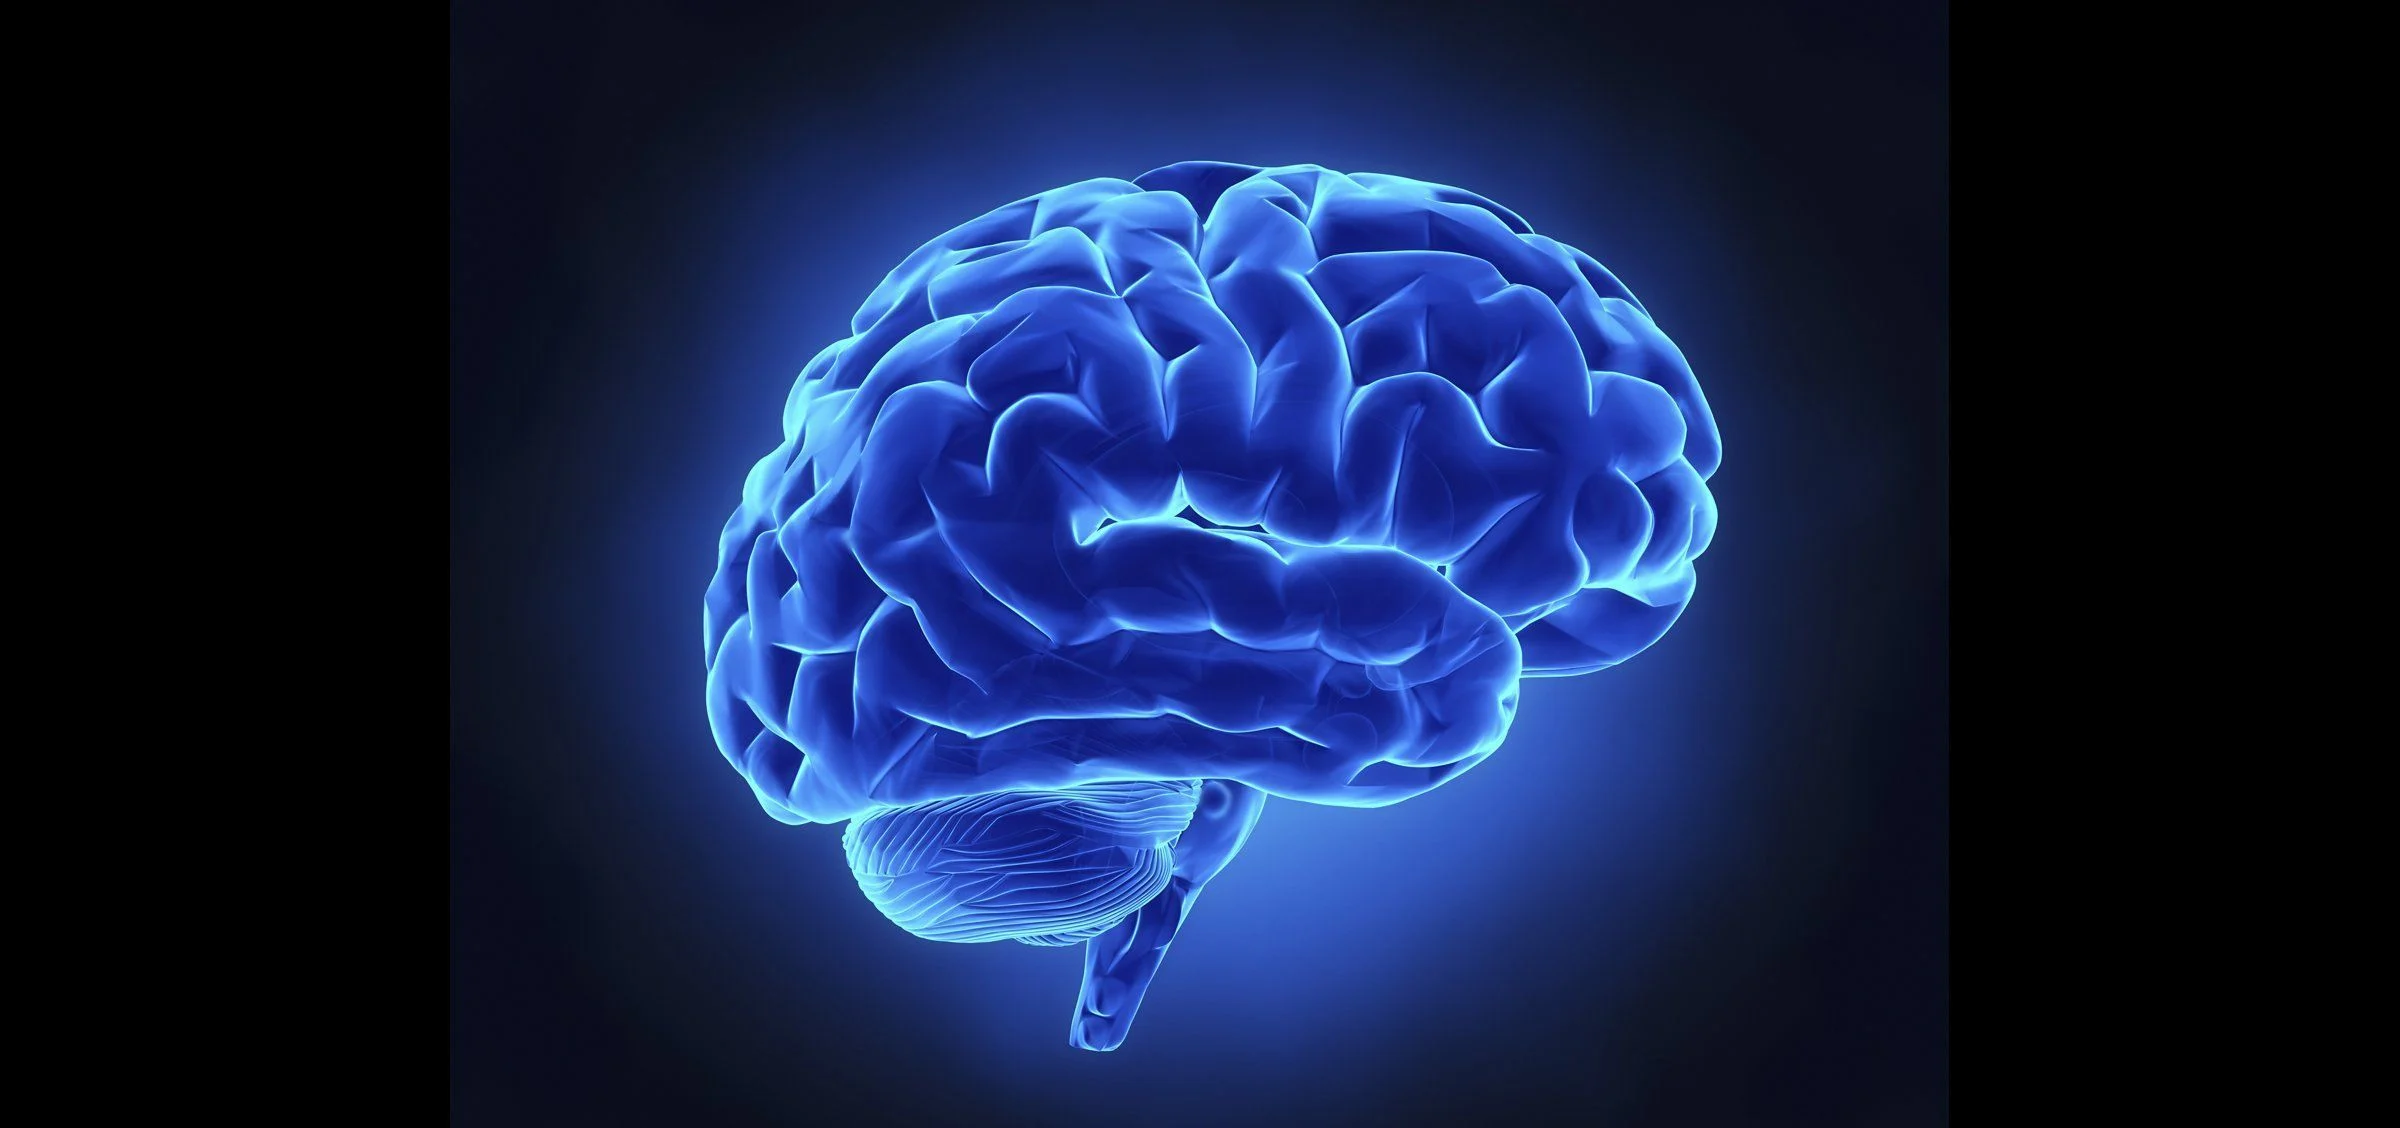


### by Lawrence Menegus 


The primary objective of this Jupyter Notebook is to conduct a comprehensive analysis of two datasets related to brain strokes. The main part of the analysis will shift towards the classification of CT images using two comparing Convolutional Neural Networks (CNN). These model will be meticulously developed and tested to accurately differentiate CT scans that exhibit signs of a stroke from those that do not. The ultimate goal is to achieve high accuracy in stroke detection based on radiological imaging. 

In [1]:
# Import Numpy 
import numpy as np

# import OS and Image for Image Prediction 
import os 
from PIL import Image 

# Import warnings for Tensorflow 
import warnings
warnings.filterwarnings('ignore')

# Import Tensorflow Module 
import tensorflow as tf

#Import Bianry Classifier model from Pytorch for CNN 1 
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models, transforms

# Import Binary Classifier from Keras for CNN 2 
from tensorflow import keras

#Import Sequential model 
from keras import Sequential

from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout

from tensorflow.keras.preprocessing import image_dataset_from_directory

# Introduction 

## 1.1 Read in the data 

The datasets that are being used in this project are from Kaggle (The online community platform for Data Scientists). 

In [2]:
# Second Dataset 
normal_brain_path = "C:/Users/lawre/Machine Learning/Term Project/Normal/"
stroke_brain_path = "C:/Users/lawre/Machine Learning/Term Project/Stroke/"

normalFolder = os.listdir(normal_brain_path)
strokeFolder = os.listdir(stroke_brain_path)

print("The Number of Images in the Normal Data: ", len(normalFolder))
print("The Number of Images in the Stroke Data: ", len(strokeFolder))



The Number of Images in the Normal Data:  1551
The Number of Images in the Stroke Data:  950


## 1.2 Checking / Cleaning the Datasets 

#### Image Data Processing: 

In [3]:
data = []

for img_file in normalFolder:
    image = Image.open(normal_brain_path + img_file) 
    image = image.resize((224, 224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
for img_file in strokeFolder:
    image = Image.open(stroke_brain_path + img_file)  
    image = image.resize((224, 224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [4]:
print("The length of the data: ",len(data))
print("The shape of the data: ",data[0].shape)
data[0]

The length of the data:  2501
The shape of the data:  (224, 224, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [6, 6, 6],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

#### Class labels: 

In [5]:
normal_label = [0]*len(normalFolder)
stroke_label = [1]*len(strokeFolder)
Target_label = normal_label + stroke_label
print("The number of target labels: ",len(Target_label))

The number of target labels:  2501


#### Convert Image data and target into a array 

In [6]:
x = np.array(data)
Y=np.array(Target_label)
print("The array for x:",  x[0])
print("The array for y:", Y)

The array for x: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [6 6 6]
  [2 2 2]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [3 3 3]
  [2 2 2]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [0 0 0]
  [0 0 0]]]
The array for y: [0 0 0 ... 1 1 1]


## 1.3 Spliting the dataset using train test split

In [7]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.10,shuffle=True)

# Scale Dataset 2 
x_train_s = x_train/255
x_test_s = x_test/255

## 1.4  Image Data Visualization 

'_CT_scans.png'

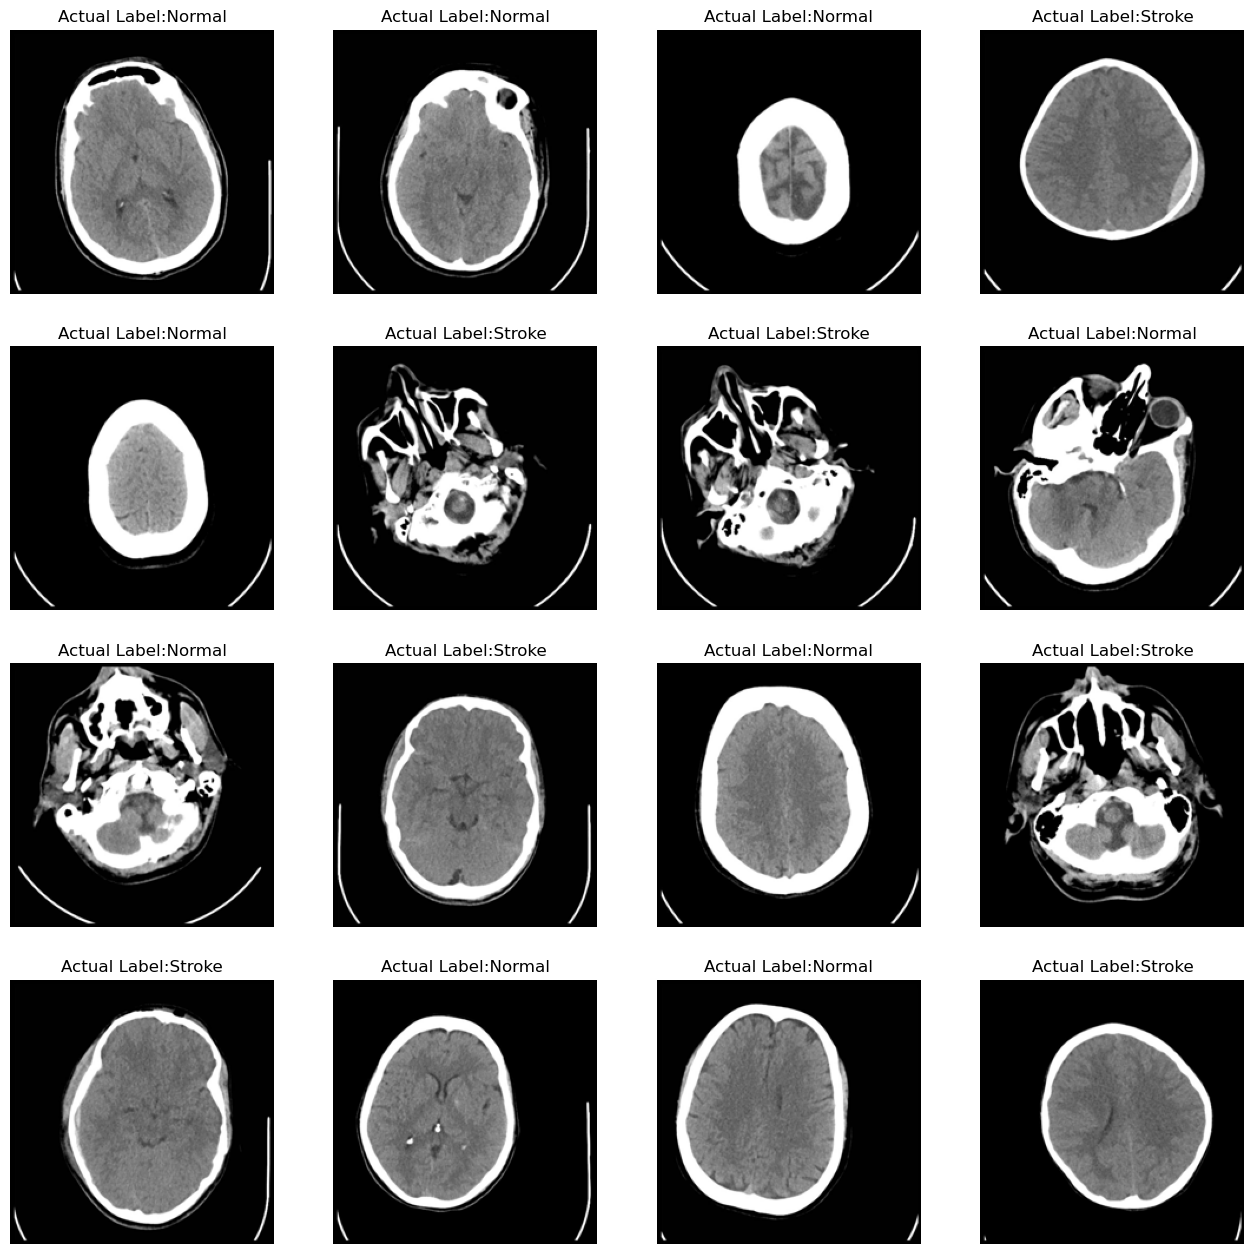

In [8]:
# Display visual for the first 20 images of the 
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(16):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[Y_train[i]]}")
    plt.axis("off")
    
# Save plot with name based on column name for PowerBi 
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'{i} _CT_scan.png'))
    
# List of saved files to confirm
saved_files =f'_CT_scans.png' 
saved_files


## 1.5 CNN Models 

## Building Both versions of the models: 

#### One is in Keras, The other is in Pytorch 

#### Binary Classifier (Convolutional Neural Network ) in PyTorch- Model 1

In [44]:
# Binary Classifier with Pytorch 

class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(256 * 7 * 7, 512)  # Adjust according to the actual flattened size
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(128)
        self.bn5 = nn.BatchNorm2d(256)
    
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.pool(F.relu(self.bn5(self.conv5(x))))
        x = x.reshape(-1, 256 * 7 * 7)  # Ensure the flattening matches the output of the last pool
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x)).squeeze()  # Ensure output is squeezed for BCELoss compatibility
        return x
    
    
# Instantiate the model, criterion, and optimizer
model = BinaryClassifier()
optimizer = optim.Adam(model.parameters(), lr= 0.0002)  # Adjusted learning rate
criterion = nn.BCELoss()

# Assuming x_train, Y_train, x_test, Y_test are defined and preprocessed
# Convert to PyTorch tensors and create data loaders
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).permute(0, 3, 1, 2)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).permute(0, 3, 1, 2)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

#### Dataloader,  Train the Model  and Evalute the Model 

In [45]:
# Create data loaders
train_loader = DataLoader(TensorDataset(x_train_tensor, Y_train_tensor), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(x_test_tensor, Y_test_tensor), batch_size=64, shuffle=False)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
    
        # Forward pass
        outputs = model(inputs)
    
        # Confirm shapes
        outputs = outputs.squeeze() 

        loss = criterion(outputs, labels)
    
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
    
        # Compute training accuracy
        predicted = outputs >= 0.5
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}')

# After training, evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = outputs >= 0.5
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Final Test Accuracy: {accuracy}')

Epoch 1/10, Loss: 0.6931162833637662, Accuracy: 0.584
Epoch 2/10, Loss: 0.6675079346762763, Accuracy: 0.5982222222222222
Epoch 3/10, Loss: 0.6534440933863322, Accuracy: 0.6226666666666667
Epoch 4/10, Loss: 0.6255187786950005, Accuracy: 0.6382222222222222
Epoch 5/10, Loss: 0.5720001420974732, Accuracy: 0.6906666666666667
Epoch 6/10, Loss: 0.4948036328156789, Accuracy: 0.7604444444444445
Epoch 7/10, Loss: 0.3726683984597524, Accuracy: 0.8484444444444444
Epoch 8/10, Loss: 0.27284762776560256, Accuracy: 0.8982222222222223
Epoch 9/10, Loss: 0.1389957950645023, Accuracy: 0.9577777777777777
Epoch 10/10, Loss: 0.1359402282949951, Accuracy: 0.9591111111111111
Final Test Accuracy: 0.9641434262948207


#### Make predictions and Evalute Prediction 

In [46]:
with torch.no_grad():
    # Assuming x_test_tensor is already permuted appropriately for the model.
    # If not, ensure to permute it as required by your model architecture.
    outputs = model(x_test_tensor)
    
    # Since the model's output is already passed through a sigmoid in the forward method,
    # we directly use the output probabilities to make predictions.
    # The outputs are squeezed to remove the single-dimensional entries from the shape.
    Y_pred_test = outputs.squeeze().numpy()
    
    # Convert probabilities to binary labels based on a 0.5 threshold.
    Y_pred_test_label = (Y_pred_test >= 0.5).astype(int)
    
# Assuming Y_test is the actual labels tensor, we convert it to a NumPy array for comparison.
# Ensure Y_test is the correct tensor containing your test labels.
actual_labels = Y_test_tensor.numpy().astype(int)

print("Actual Labels:", actual_labels[:10])
print("Predicted Labels:", Y_pred_test_label[:10])   

Actual Labels: [1 0 1 1 1 0 0 0 0 0]
Predicted Labels: [1 1 1 1 1 0 0 0 0 0]


In [47]:
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred_test_label))
print()
print("Classification Report:\n",classification_report(Y_test,Y_pred_test_label))

Confusion Matrix:
 [[141   6]
 [  3 101]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       147
           1       0.94      0.97      0.96       104

    accuracy                           0.96       251
   macro avg       0.96      0.97      0.96       251
weighted avg       0.96      0.96      0.96       251



#### Create a PR (Precision- Recall) Curve  for Model 1 

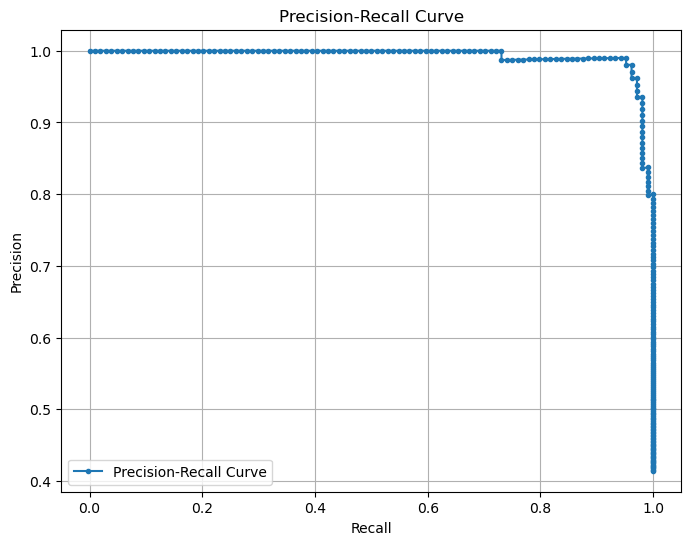

'Pr_curve.png'

In [48]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_test)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'PR_cruve.png'))
plt.show()


saved_files = f'Pr_curve.png'
saved_files  


#### Calculating Sensitivity (True Positive Rate) and Specificity (True Negative Rate)

In [49]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_test_label).ravel()

# Calculate teh Sensitivity and Specificity 
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity of Model: ", sensitivity)
print("specificity of Model: ", specificity)

Sensitivity of Model:  0.9711538461538461
specificity of Model:  0.9591836734693877


### The Model indicates with:

##### Sensitivity - the model correctly Idenifies almost   97 % of True positive cases 
##### Specificity - the model correctly idenitifies almost  95 % of true negative cases 

### Creating a prediction model using a Binary Classifier (Convolutional Neural Network) in Keras- Model 2

In [52]:
cnn = Sequential()

# First Convolutional Block
cnn.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Block
cnn.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Block
cnn.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Flattening followed by Dense layers
cnn.add(Flatten())
cnn.add(Dense(units=500, activation="relu"))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=500, activation="relu"))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=1, activation="sigmoid"))

# Compile the Model 
cnn.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

cnn.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 80)      72080     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 80)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        46144     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)      

#### Training the Model

In [53]:
#using a Keras model to train the a CNN on this dataset 
history = cnn.fit(x_train_s,Y_train,batch_size=32,
         epochs=5, validation_data=(x_test_s,Y_test))

print()

#Calculate lost and Accuracy in the Test set 
loss, acc = cnn.evaluate(x_test_s,Y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

print()

# Calculate the Lost and Accuracy in the Training set 
loss, acc = cnn.evaluate(x_train_s,Y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

Epoch 1/5


71/71 [==============================] - 196s 3s/step - loss: 0.6371 - accuracy: 0.6493 - val_loss: 0.3989 - val_accuracy: 0.8207
Epoch 2/5
71/71 [==============================] - 195s 3s/step - loss: 0.3140 - accuracy: 0.8600 - val_loss: 0.2843 - val_accuracy: 0.8566
Epoch 3/5
71/71 [==============================] - 230s 3s/step - loss: 0.1237 - accuracy: 0.9449 - val_loss: 0.0982 - val_accuracy: 0.9482
Epoch 4/5
71/71 [==============================] - 209s 3s/step - loss: 0.0497 - accuracy: 0.9804 - val_loss: 0.0621 - val_accuracy: 0.9641
Epoch 5/5
71/71 [==============================] - 200s 3s/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0472 - val_accuracy: 0.9761

8/8 [==============================] - 3s 424ms/step - loss: 0.0472 - accuracy: 0.9761
Loss on Test Data: 0.047243308275938034
Accuracy on Test Data: 0.9760956168174744

71/71 [==============================] - 32s 456ms/step - loss: 0.0065 - accuracy: 0.9969
Loss on Train Data: 0.006453125271946

#### Prediction for Model

In [54]:
# Create a prediction 
Y_pred_test2 = cnn.predict(x_test_s)
Y_pred_test_label2 = [1 if i>=0.5 else 0 for i in Y_pred_test2]
print("Actual Label:",Y_test[:10])
print("Predicted Label:",Y_pred_test_label2[:10])

8/8 [==============================] - 4s 447ms/step
Actual Label: [1 0 1 1 1 0 0 0 0 0]
Predicted Label: [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]


#### Evalulation of Test data 

In [55]:
# Creating a Confusion matrix 
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred_test_label2))

# printing the Classification report 
print("Classification Report:\n",classification_report(Y_test,Y_pred_test_label2))

Confusion Matrix:
 [[146   1]
 [  5  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.99      0.95      0.97       104

    accuracy                           0.98       251
   macro avg       0.98      0.97      0.98       251
weighted avg       0.98      0.98      0.98       251



#### Create a PR (Precision-Recall) Curve

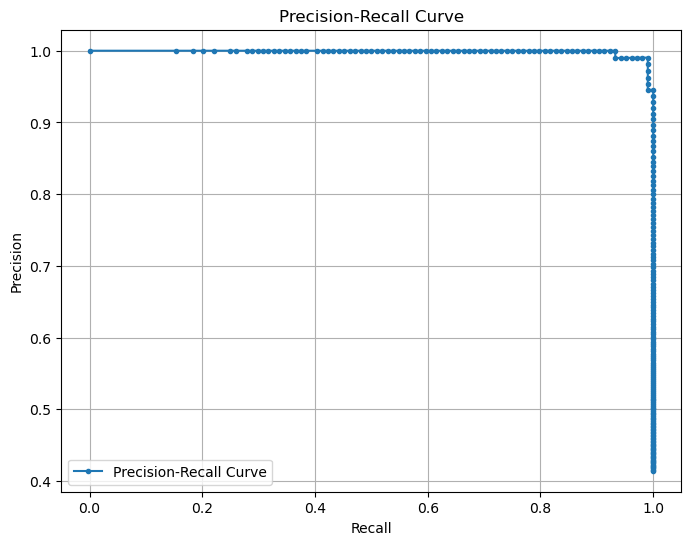

'Pr_curve2.png'

In [56]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_test2)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'PR_cruve2.png'))
plt.show()


saved_files = f'Pr_curve2.png'
saved_files  


#### Calculating Sensitivity (True Positive Rate) and Specificity (True Negative Rate)

In [57]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_test_label2).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity of Model: ", sensitivity)
print("specificity of Model: ", specificity)

Sensitivity of Model:  0.9519230769230769
specificity of Model:  0.9931972789115646


#### The Model indicates with:

##### Sensitivity - the model correctly Idenifies almost 95% of True positive cases 
##### Specificity - the model correctly idenitifies almost 99% of true negative cases 

## 1.6 Visualization of Both Models 

#### Image predictions on Test data - model 1 

' pred_CT_scans.png'

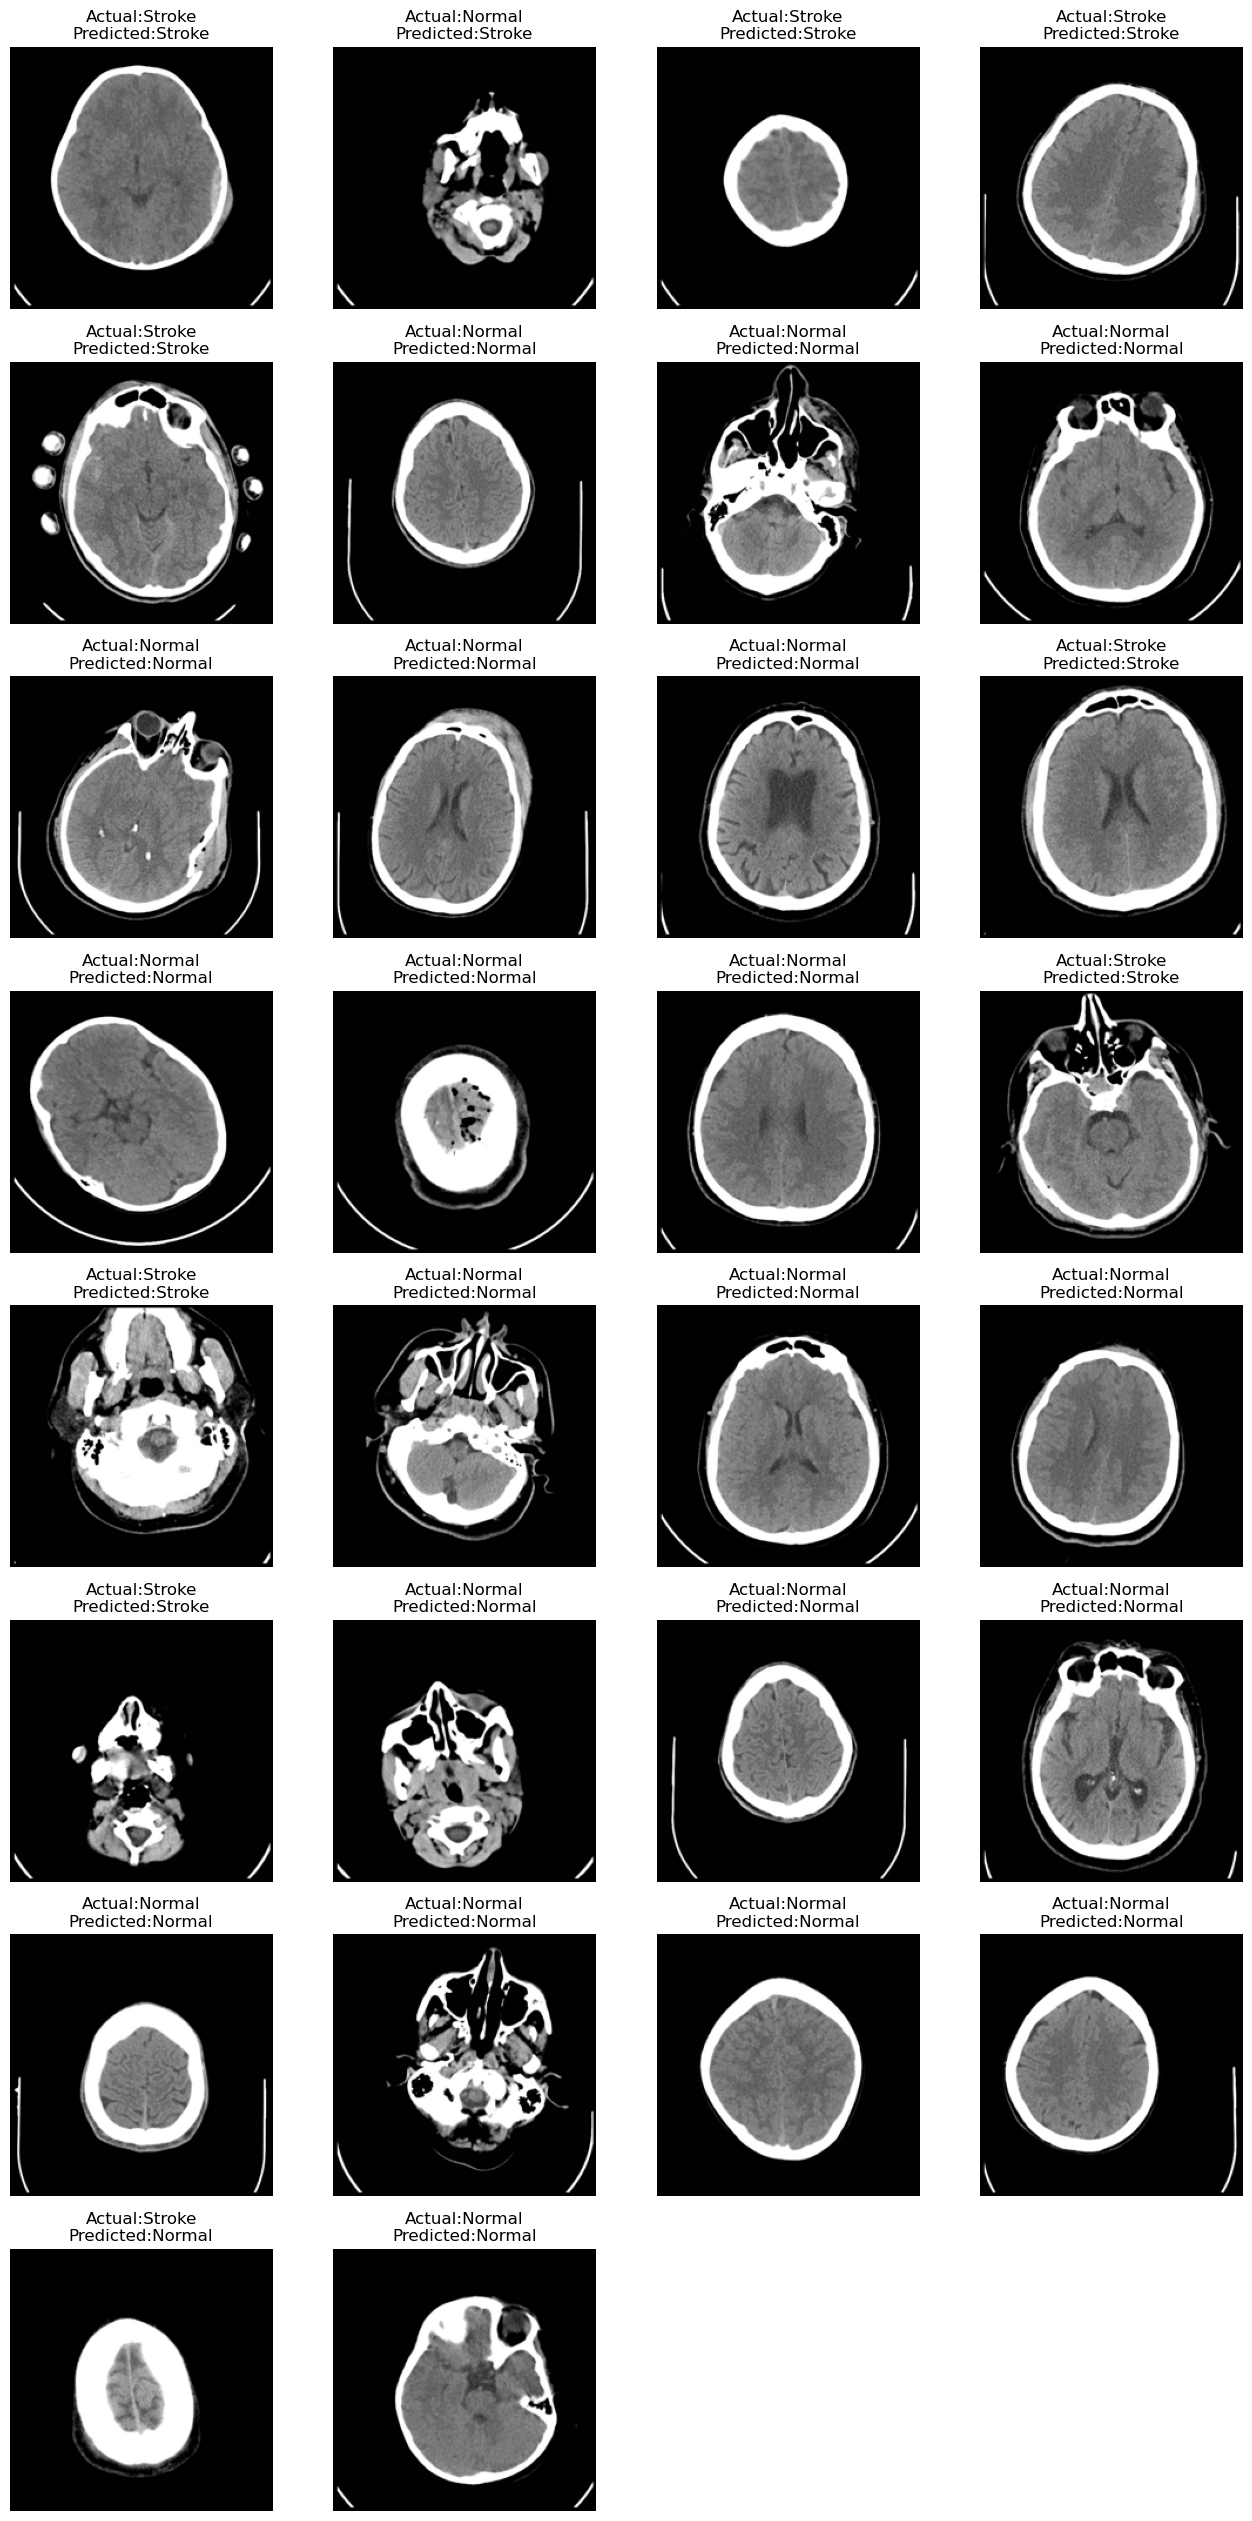

In [50]:
# Creating the image prediction based on the CNN 

class_labels = ["Normal","Stroke"]

plt.figure(figsize=(16,32))

for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[Y_test[i]]}\nPredicted:{class_labels[Y_pred_test_label[i]]}")
    plt.axis("off")
    
    
# Save plot with name based on column name for PowerBi 
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f' pred_CT_scan.png'))
saved_files = f' pred_CT_scans.png' 
saved_files


#### Image predictions on Test data - model 2

' pred_CT_scans2.png'

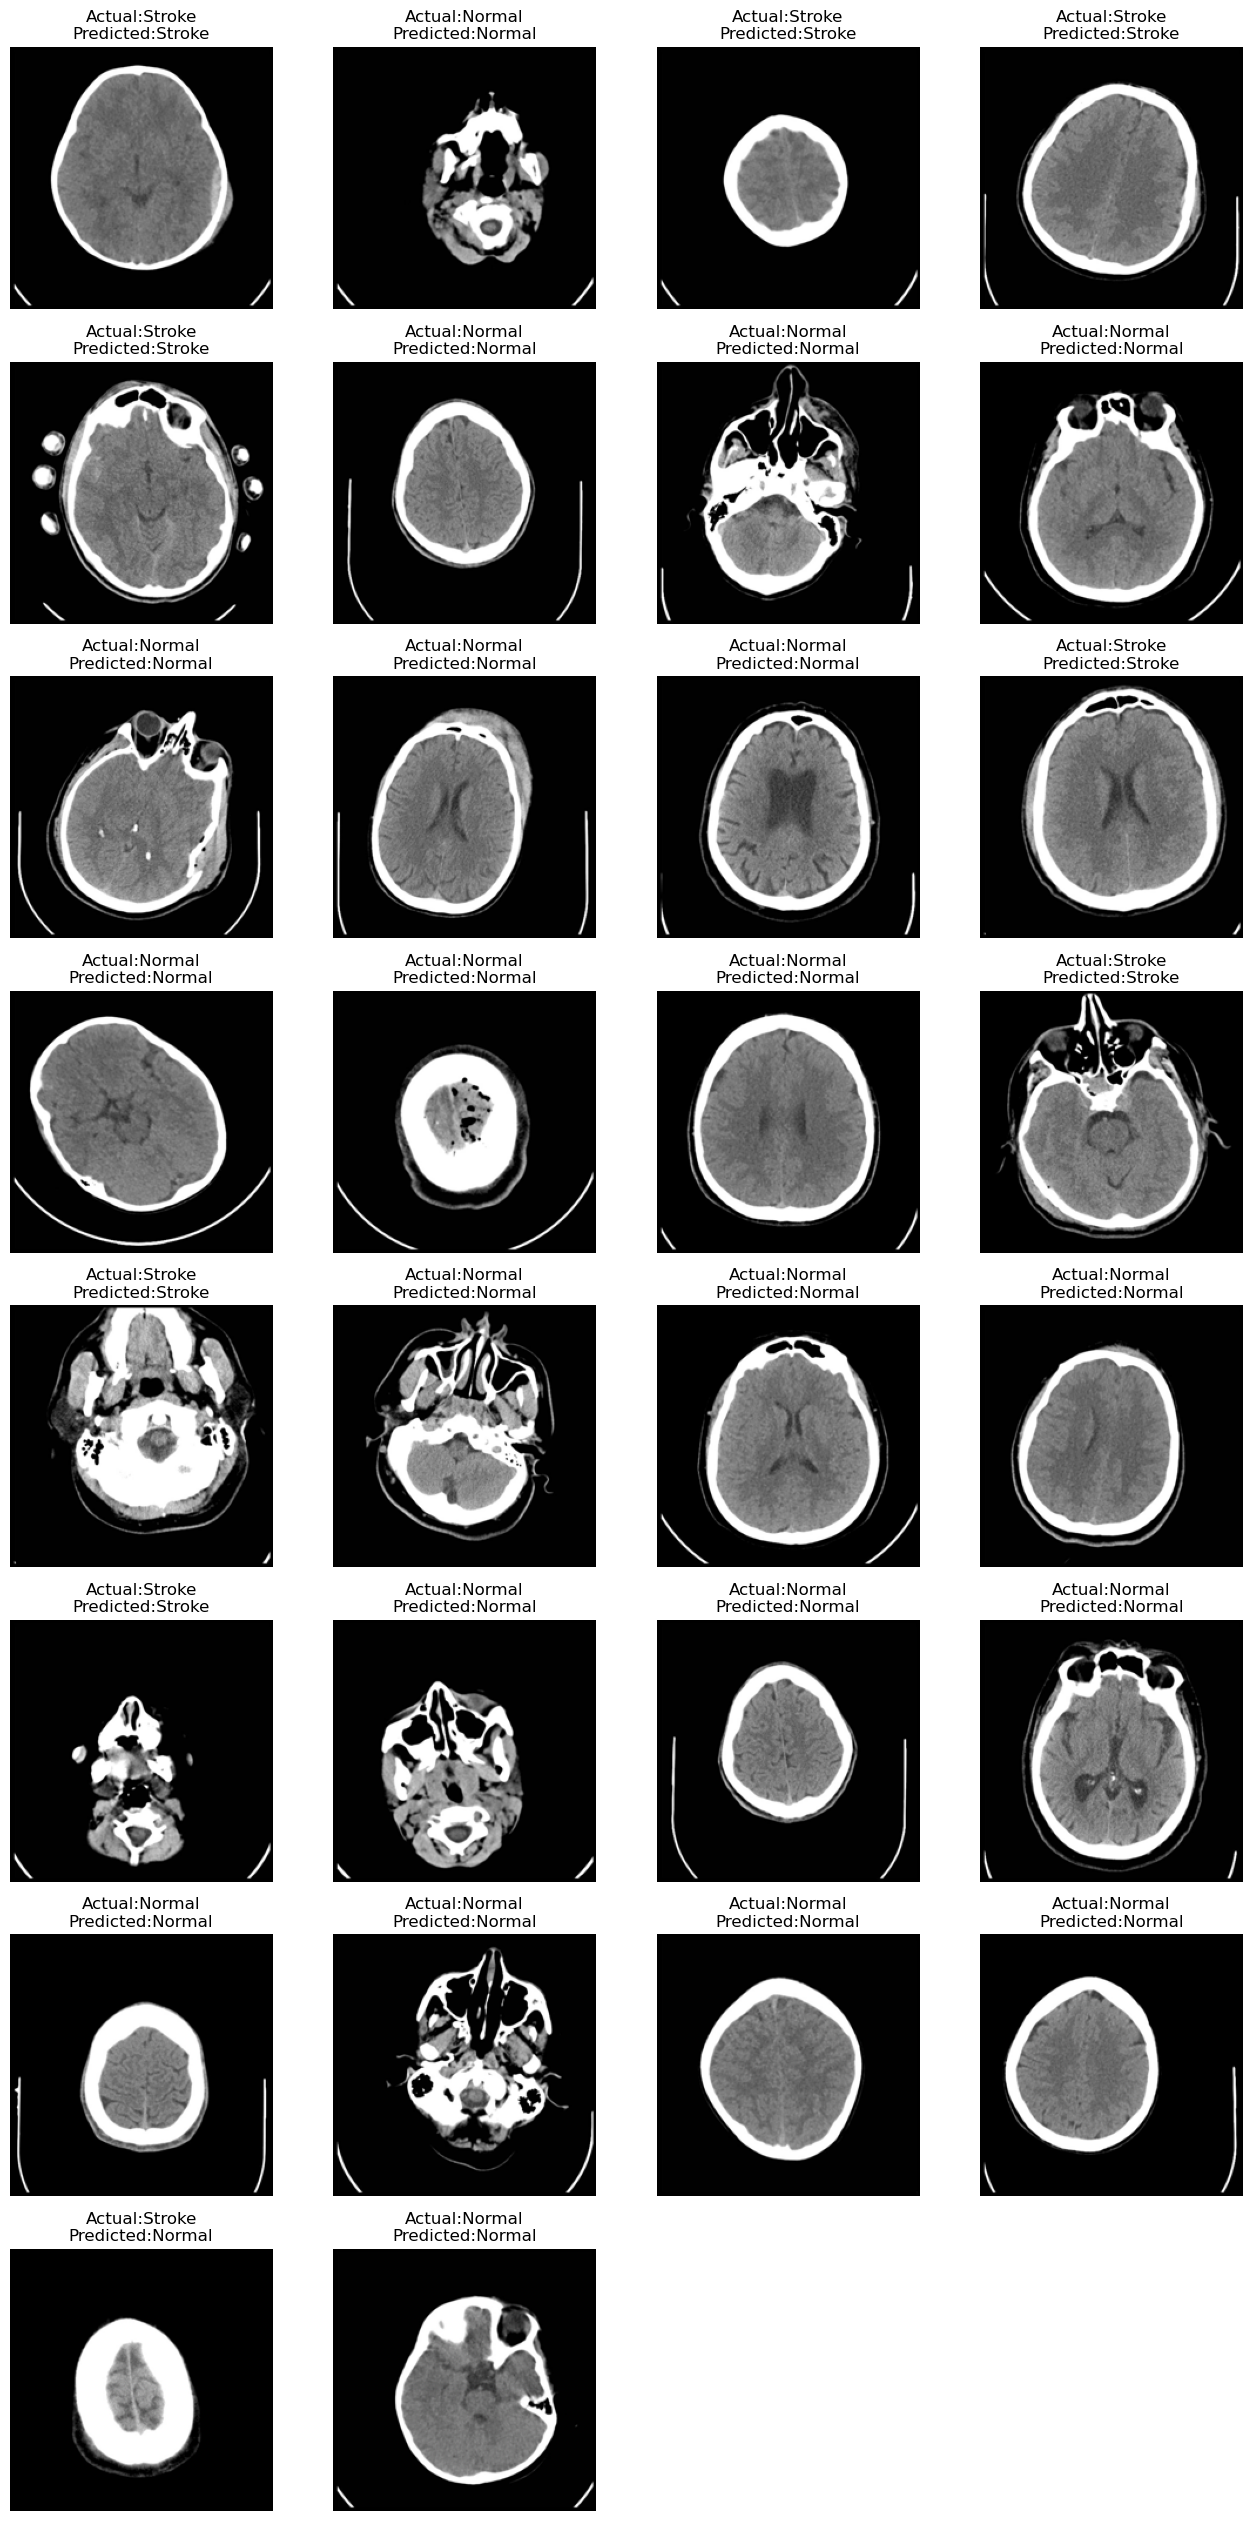

In [58]:
# Creating the image prediction based on the CNN 

class_labels = ["Normal","Stroke"]

plt.figure(figsize=(16,32))

for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[Y_test[i]]}\nPredicted:{class_labels[Y_pred_test_label2[i]]}")
    plt.axis("off")
    
# Save plot with name based on column name for PowerBi 
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f' pred_CT_scan2.png'))
saved_files = f' pred_CT_scans2.png' 
saved_files


## References:  

### From Kaggle: 

#### 2. Brain Stroke CT Image Dataset  - afridirahman

URL : https://www.kaggle.com/datasets/afridirahman/brain-stroke-ct-image-dataset?resource=download 